In [0]:
from PIL import Image 
import glob, random 
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms

from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
! unzip SPAI_lens_dataset.zip

Archive:  SPAI_lens_dataset.zip
   creating: SPAI_lens_dataset/test/
   creating: SPAI_lens_dataset/test/A/
 extracting: SPAI_lens_dataset/test/A/80.png  
 extracting: SPAI_lens_dataset/test/A/81.png  
 extracting: SPAI_lens_dataset/test/A/82.png  
 extracting: SPAI_lens_dataset/test/A/83.png  
 extracting: SPAI_lens_dataset/test/A/84.png  
 extracting: SPAI_lens_dataset/test/A/85.png  
 extracting: SPAI_lens_dataset/test/A/86.png  
 extracting: SPAI_lens_dataset/test/A/87.png  
 extracting: SPAI_lens_dataset/test/A/88.png  
 extracting: SPAI_lens_dataset/test/A/89.png  
 extracting: SPAI_lens_dataset/test/A/90.png  
 extracting: SPAI_lens_dataset/test/A/91.png  
   creating: SPAI_lens_dataset/test/B/
  inflating: SPAI_lens_dataset/test/B/81_0_1.50_1.06_167.png  
  inflating: SPAI_lens_dataset/test/B/82_0_0.92_0.90_98.png  
  inflating: SPAI_lens_dataset/test/B/83_0_1.02_0.86_119.png  
  inflating: SPAI_lens_dataset/test/B/84_0_1.08_1.31_27.png  
  inflating: SPAI_lens_dataset/test/B/8

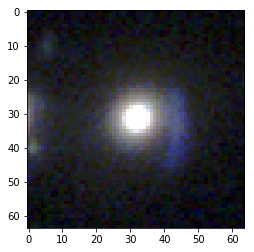

In [0]:
smpl_img = Image.open("SPAI_lens_dataset/train/A/33.png")
plt.imshow(smpl_img)


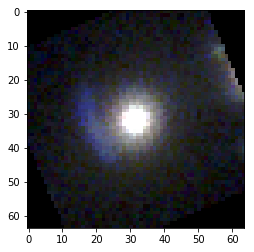

In [0]:
RR = transforms.RandomRotation((0, 360))

TT = transforms.ToTensor()
TPIL = transforms.ToPILImage()
myTransforms = transforms.Compose([RR, TT])

img_R = myTransforms(smpl_img)
plt.imshow(TPIL(img_R))

In [0]:
class ImageDataset(torch.utils.data.Dataset):
  def __init__(self, root, transforms=None):
    self.transforms = transforms
    path_A = root +'A'
    self.files_A = glob.glob(path_A + '/*.*')
    path_B = root +'B'
    self.files_B = glob.glob(path_B + '/*.*')
    
  def __getitem__(self, index):
    rand_A_file = self.files_A[random.randint(0, len(self.files_A)-1) #Select random lens image file
    rand_A_im = Image.open(rand_A_file) #Open random lens image file
    tr_A = self.transforms(rand_A_im) #Transform random lens image
    
    rand_B_file = self.files_B[random.randint(0, len(self.files_B)-1)
    rand_B_im = Image.open(rand_B_file)
    tr_B = self.transforms(rand_B_im)                           

    return {'A':tr_A, 'B':tr_B, 'A_label':1.0, 'B_label':0.0}
  
  def __len__(self):
    return 150

In [0]:
# Prepare the data

data_path = 'SPAI_lens_dataset/'
train_dataloader = torch.utils.data.DataLoader(ImageDataset(data_path+'train/',
                                                           transforms=myTransforms),
                                              batch_size=32,
                                              shuffle=True)

train_dataloader = torch.utils.data.DataLoader(ImageDataset(data_path+'test/',
                                                           transforms=myTransforms),
                                              batch_size=32,
                                              shuffle=True)

In [0]:
print('Number of Batches:', len(train_dataloader))

smpl_batch = next(iter(train_dataloader))

print('A Data shape: ', smpl_batch['A'].shape)
print(smpl_batch['A_label'])
print('B Data shape: ', smpl_batch['B'].shape)
print(smpl_batch['B_label'])

Number of Batches: 5
A Data shape:  torch.Size([32, 3, 64, 64])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)
B Data shape:  torch.Size([32, 3, 64, 64])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)
